## **ECOM90025 ADA Tutorial 7** ##

In [ ]:
!pip install -q econml

In [ ]:
# library package
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import chi2_contingency
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
import patsy
from econml.dml import LinearDML
from econml.iv.dml import DMLIV
from econml.sklearn_extensions.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

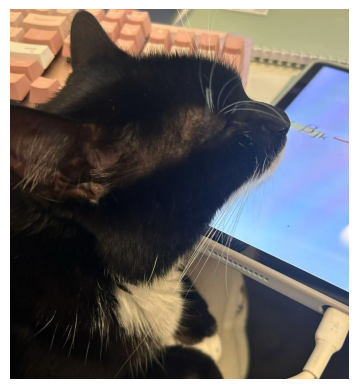

In [ ]:
# cat picture: mom econometrics is too hard cat falling asleep·
# https://drive.google.com/file/d/1Rn9O7OY2GSk226M7d8HHdsBohGS-Yjew/view?usp=drive_link
url = 'https://drive.google.com/uc?id=1Rn9O7OY2GSk226M7d8HHdsBohGS-Yjew'

# Download and open the image
response = requests.get(url)
image = Image.open(BytesIO(response.content))

# my state this week with 2 mid exams
# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

### **Orange juice price elasticity determination using double ML**

$$\log(move) = \beta \cdot income \times \log(price) + controls+ɛ$$
to learn price elasticity. That is, the derivative of $\log(move)$ on $\log(price)$ fixing different income level


In [ ]:
# read in the data
oj_data = pd.read_csv("https://www.dropbox.com/scl/fi/p87ibtcswr221ty5tbout/oj_data.csv?rlkey=qj4bd34srvujac45kkirv8qvw&dl=1")
oj_data

# what does each variable mean
# store: store id
# brand: brand id
# log move: sales volumn in particular store in particular week
# feat: whether brands featured in advertisement
# store feature controls: demographic of store area: % abover 60, college years, average income, % women full time etc.
# SSTRDIST: distance to the nearest warehouse/club store
# CPDIST5: average distance (miles) to the nearest five supermarkets

,store,brand,week,logmove,feat,price,AGE60,EDUC,ETHNIC,INCOME,HHLARGE,WORKWOM,HVAL150,SSTRDIST,SSTRVOL,CPDIST5,CPWVOL5
0,2,tropicana,40,9.018695,0,3.87,0.232865,0.248935,0.11428,10.553205,0.103953,0.303585,0.463887,2.110122,1.142857,1.92728,0.376927
1,2,tropicana,46,8.723231,0,3.87,0.232865,0.248935,0.11428,10.553205,0.103953,0.303585,0.463887,2.110122,1.142857,1.92728,0.376927
2,2,tropicana,47,8.253228,0,3.87,0.232865,0.248935,0.11428,10.553205,0.103953,0.303585,0.463887,2.110122,1.142857,1.92728,0.376927
3,2,tropicana,48,8.987197,0,3.87,0.232865,0.248935,0.11428,10.553205,0.103953,0.303585,0.463887,2.110122,1.142857,1.92728,0.376927
4,2,tropicana,50,9.093357,0,3.87,0.232865,0.248935,0.11428,10.553205,0.103953,0.303585,0.463887,2.110122,1.142857,1.92728,0.376927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28942,137,dominicks,156,7.987524,0,2.00,0.209602,0.528362,0.11325,10.966490,0.092996,0.330293,0.860739,6.026484,0.705882,0.77253,0.333761
28943,137,dominicks,157,8.502689,0,1.94,0.209602,0.528362,0.11325,10.966490,0.092996,0.330293,0.860739,6.026484,0.705882,0.77253,0.333761
28944,137,dominicks,158,9.505991,0,1.59,0.209602,0.528362,0.11325,10.966490,0.092996,0.330293,0.860739,6.026484,0.705882,0.77253,0.333761
28945,137,dominicks,159,10.927376,0,1.49,0.209602,0.528362,0.11325,10.966490,0.092996,0.330293,0.860739,6.026484,0.705882,0.77253,0.333761


In [ ]:
# we first consider the case we do not use IV
# Prepare data
# we need to think about what are variables that we need
# Y (response): logmove
# T (treatment): log price
# X (interaction of interest): income
# W (controls): all the store level features

# initialize the standardization (mean 0 variance 1)
scaler = StandardScaler()

# separate out the Y T and X
Y      = oj_data['logmove'].values
T      = np.log(oj_data["price"]).values # for log variale, we dont do transformation
X=scaler.fit_transform(oj_data[['INCOME']].values)

# Define the controls
W1 = scaler.fit_transform(
    oj_data[[c for c in oj_data.columns
    if c not in ['price'   ,
                 'logmove' ,
                 'brand'   ,
                 'week'    ,
                 'store'   ,
                 'INCOME'  ,
                 'SSTRDIST',
                 'CPDIST5' ]]].values # dont include these two because they are IV
    )

W2 = pd.get_dummies(oj_data[['brand']]).values # transfer to dummies and don't do standarization
W = np.concatenate([W1, W2], axis=1)



$$Y=D\theta_0 + g_0(X)+U, \quad E(U\mid X, D)=0$$
$$D = m_0(X)+V, \quad E(V\mid X)=0$$

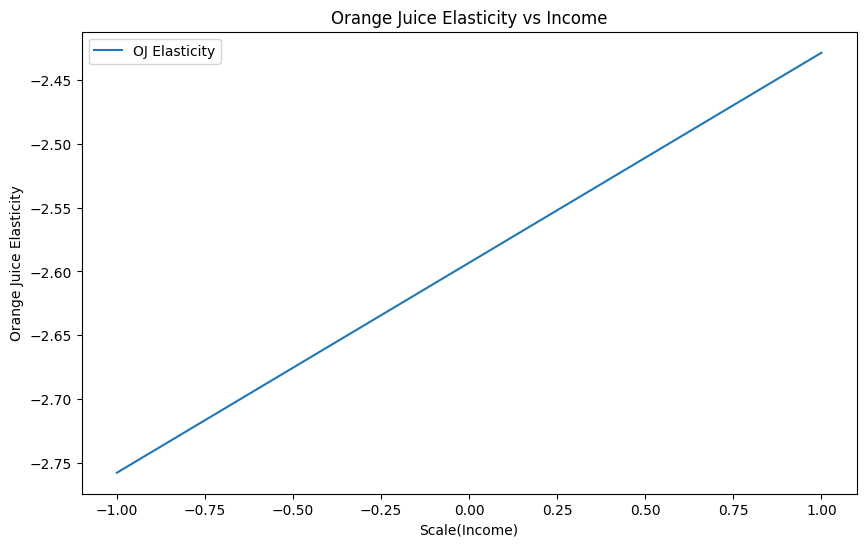

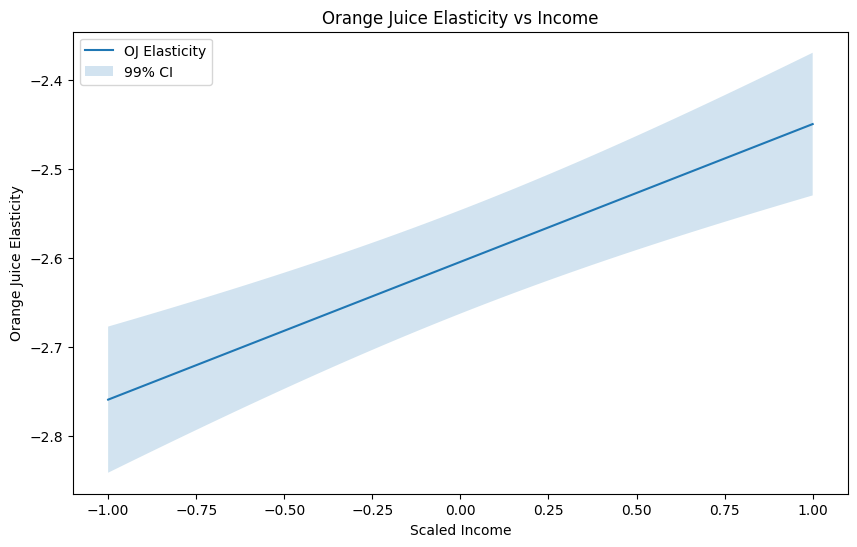

In [ ]:
# for the purpose of generating aplot for
# Generate test data, spread of income from -1 to 1 with step size of 0.02
min_income = -1
max_income = 1
delta = (1 - (-1)) / 100
X_test = np.arange(min_income, max_income + delta - 0.001, delta).reshape(-1,1)

# fit the double ML
est = LinearDML()
est.fit(Y, T, X=X, W=W)
te_pred=est.effect(X_test)

# plot the graph (elasticity as function of income)
plt.figure(figsize=(10,6))
plt.plot(X_test, te_pred, label="OJ Elasticity")
plt.xlabel(r'Scale(Income)')
plt.ylabel('Orange Juice Elasticity')
plt.legend()
plt.title("Orange Juice Elasticity vs Income")
plt.show()

# if we want to include 99% interval for this
est.fit(Y, T, X=X, W=W)
te_pred=est.effect(X_test)
te_pred_interval = est.const_marginal_effect_interval(X_test, alpha=0.01)

# Plot with confidence interval
plt.figure(figsize=(10,6))
plt.plot(X_test.flatten(), te_pred, label="OJ Elasticity")
plt.fill_between(X_test.flatten(), te_pred_interval[0], te_pred_interval[1], alpha=0.2, label="99% CI")
plt.xlabel('Scaled Income')
plt.ylabel('Orange Juice Elasticity')
plt.title("Orange Juice Elasticity vs Income")
plt.legend()
plt.show()

### **Instrumental variables**

- SSTRDIST: distance to the nearest warehouse store
- CPDIST5: average distance in miles to the nearest 5 supermarkets

Distances are usually used as IV because they are *exogenous* and can be related to the endogenous variable. In this application, it is intuitive to consider that the price is sensitive to competitions. Short distance means more competitions.

The distance to other stores or the warehouse may not directly affect the sales. However, many stores nearby may split residence and affect sales, hence, it still can be an invalid IV. Use with caution.

#### DMLIV workflow (conceptual)

**1) Cross‐fit nuisance functions.** Split the sample into folds. For each fold, fit on the other folds and predict on the held-out fold:
$$
\hat g(X,W)\approx \mathbb{E}[Y\mid X,W],\qquad
\hat m(X,W)\approx \mathbb{E}[T\mid X,W],\qquad
\hat r(X,W,Z)\approx \mathbb{E}[T\mid X,W,Z].
$$
*(Cross-fitting helps prevent overfitting leakage.)*

**2) Orthogonalize (residualize).** Build signals robust to small ML errors (Neyman-orthogonality):
$$
\tilde Y \;=\; Y-\hat g(X,W),\qquad
\tilde T \;=\; \hat r(X,W,Z)-\hat m(X,W).
$$

**3) Final stage (learn $\( \theta(X) \$).** Fit the final model to minimize the orthogonalized squared loss:
$$
\sum_{i}\big(\tilde Y_i - \theta(X_i)\cdot \tilde T_i\big)^2.
$$


/usr/local/lib/python3.12/dist-packages/econml/dml/dml.py:192: UserWarning: The final model has a nonzero intercept for at least one outcome; it will be subtracted, but consider fitting a model without an intercept if possible.
  warn("The final model has a nonzero intercept for at least one outcome; "



Orange Juice elasticity estimates (IV estimation) below.



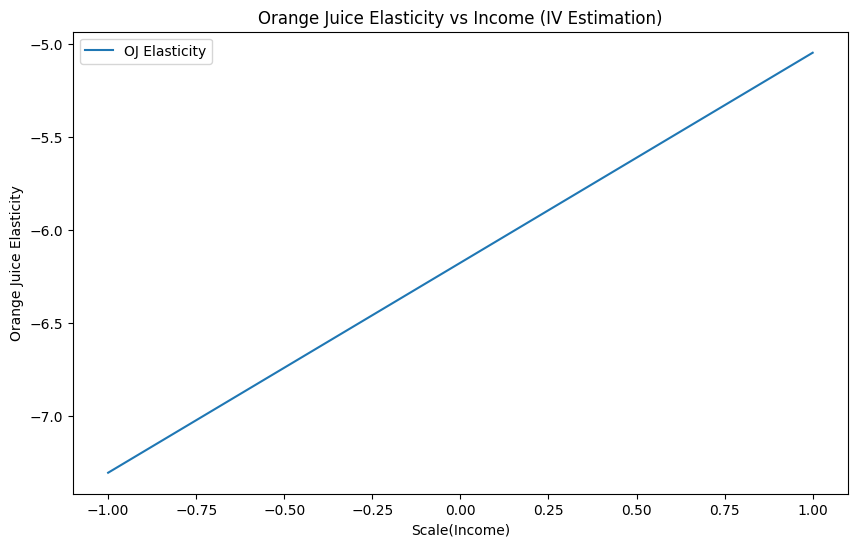

In [ ]:
# why do we do this: because double ML itself does not resolve the problem of OVB
# price is a factor that has simultanity: factors impact price and sales at the same time
# in addition to previous definition we need to generate instruments
Z = scaler.fit_transform(oj_data[["SSTRDIST", "CPDIST5"]].values) # why are they valid?

# initialize a lot of LinearRegression() classes.
model_y_xw  = LinearRegression() # to determine how to fit Y to X and W
model_t_xw  = LinearRegression() # to determine how to fit T to X and W
model_t_xwz = LinearRegression() # to determine how to fit T to X, W and Z
model_final = LinearRegression()

# Fit the model via linear DML
dmliv = DMLIV(
    model_y_xw   = model_y_xw,
    model_t_xw   = model_t_xw,
    model_t_xwz  = model_t_xwz,
    model_final  = model_final,
    cv           = 5,            # Cross-validation splitting strategy (5 folds)
    random_state = 123           # For replication purposes
)
dmliv.fit(Y=Y, T=T, X=X, Z=Z, W=W)


# We already have the X_test grid from before, so go straight to prediction
te_pred = dmliv.effect(X_test)

# Now plot the same elasticity versus income estimates, but via IV
print(f"\nOrange Juice elasticity estimates (IV estimation) below.\n")
plt.figure(figsize=(10,6))
plt.plot(X_test, te_pred, label="OJ Elasticity")
plt.xlabel(r'Scale(Income)')
plt.ylabel('Orange Juice Elasticity')
plt.legend()
plt.title("Orange Juice Elasticity vs Income (IV Estimation)")
plt.show()
